In [ ]:
# Importing libraries

from google.colab import drive
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading dataset

data = pd.read_csv("/content/drive/My Drive/My data files/Sales_Transactions_Dataset_Weekly.csv")

In [ ]:
# Returning first 5 rows

data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,...,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,...,0.72,0.33,0.33,0.33,0.61,0.33,0.00,0.50,0.11,0.44,0.22,0.50,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.50,0.17,0.11,0.61,0.39,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,...,0.60,0.20,0.00,0.60,0.20,0.70,0.70,0.90,0.40,0.70,0.20,0.40,0.50,0.30,0.50,0.80,0.50,0.50,0.30,0.10,0.30,0.20,0.30,1.00,0.50,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,...,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.00,0.18,0.00,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,...,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.00,0.24,0.29,0.00,0.18,0.59,0.18,1.00,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,...,0.33,0.07,0.67,0.33,0.47,0.80,0.20,0.67,0.53,0.20,0.47,0.40,0.33,0.60,0.33,0.40,0.67,0.00,0.13,0.00,0.13,0.13,0.40,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [ ]:
# Returns dimensions of dataframe

data.shape

(811, 107)

Plotting maximum product sales count weekly 

In [ ]:
new_data = data.iloc[:,:54]
new_data.index = new_data["Product_Code"]
new_data.drop(labels = "Product_Code",axis = 1,inplace = True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


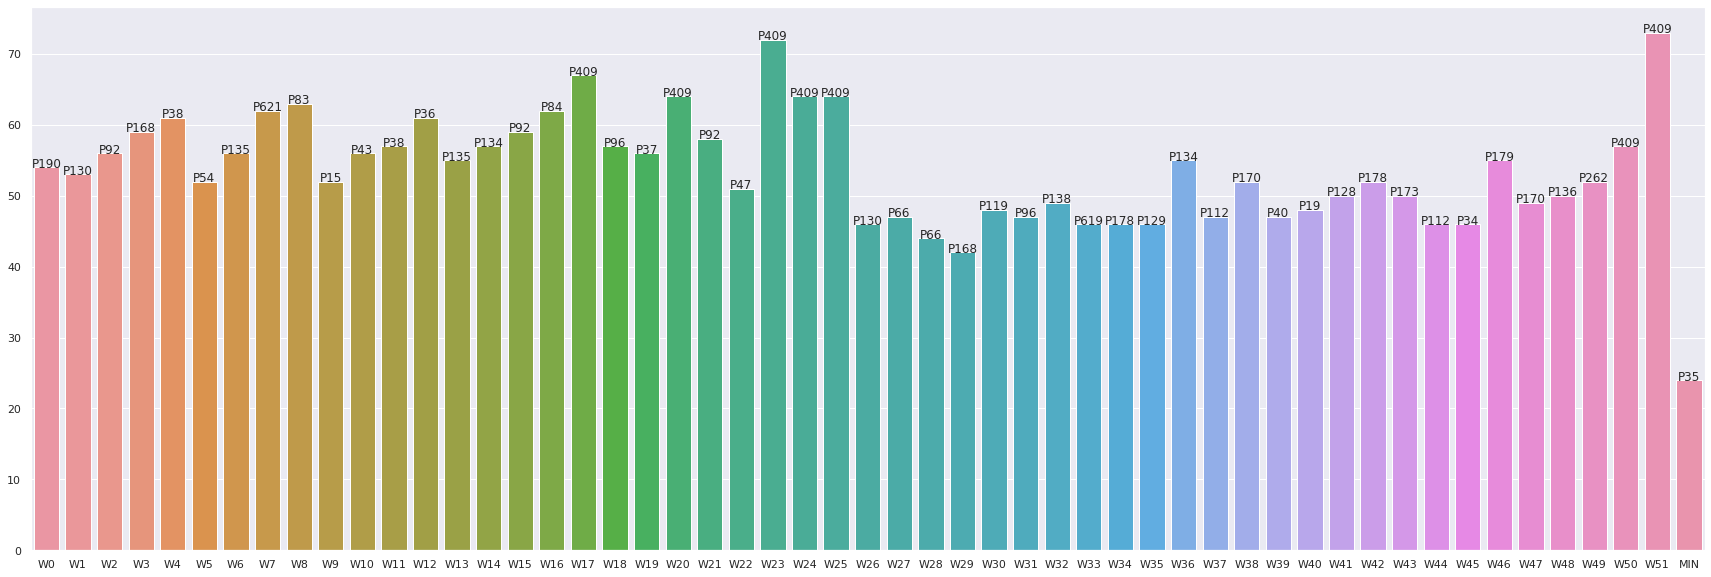

In [ ]:
product_max = new_data.idxmax()
max_sales_week = new_data.max()
# plot vertical barplot
sb.set(rc={'figure.figsize':(30,10)})
ax = sb.barplot(new_data.columns,max_sales_week)
# ax.set(title=’Total Number of Passengers Yearly’) # title barplot
# label each bar in barplot
for i,p in enumerate(ax.patches):
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height, # y-coordinate position of data label, padded 100 above bar
 s = '{}'.format(product_max[i]), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

In [ ]:
# Returns data types of variables in dataset
data.dtypes

Product_Code      object
W0                 int64
W1                 int64
W2                 int64
W3                 int64
                  ...   
Normalized 47    float64
Normalized 48    float64
Normalized 49    float64
Normalized 50    float64
Normalized 51    float64
Length: 107, dtype: object

In [ ]:
# Generating descriptive statistics

data.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,...,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,9.790382,9.678175,9.827374,9.686806,9.907522,10.045623,10.033292,9.905055,10.007398,9.644883,9.849568,9.710234,9.902589,9.861899,10.166461,8.892725,6.950678,7.193588,7.383477,7.339088,7.607891,7.610358,7.759556,7.906289,7.992602,7.997534,8.014797,8.073983,8.251541,7.965475,...,0.338878,0.331591,0.355771,0.344821,0.335919,0.345253,0.354994,0.330210,0.340271,0.353551,0.366017,0.370629,0.417694,0.389618,0.207596,0.223046,0.229605,0.224365,0.240493,0.250395,0.248323,0.259371,0.262256,0.268903,0.270173,0.273144,0.277497,0.264994,0.286375,0.279396,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,13.577685,13.007548,13.366525,13.214865,13.389975,13.743655,13.890316,13.364486,13.560015,13.129259,13.473781,12.827964,13.003290,12.617572,12.298777,10.016879,9.449151,9.729464,10.187970,10.161884,10.600332,10.390931,10.714137,10.838140,10.824638,10.773653,10.950947,10.854683,11.272094,10.758691,...,0.299536,0.289895,0.300587,0.312811,0.301809,0.302416,0.299286,0.297747,0.299420,0.294376,0.304491,0.303188,0.315159,0.323586,0.214272,0.226805,0.229479,0.229580,0.235536,0.248798,0.237675,0.247164,0.248657,0.249708,0.257877,0.248350,0.253397,0.246666,0.262363,0.253084,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
# Checking missing values

data.isnull().sum()

Product_Code     0
W0               0
W1               0
W2               0
W3               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 107, dtype: int64

In [ ]:
data_1= data.iloc[:,0]
data_normalized = pd.concat([data_1,data.iloc[:,55:]],axis =1)

In [ ]:
print("Before removing Outlier,Data Length: ",len(data))
def outlier_IQR(data_column):
    Q1=data_column.quantile(0.20)
    Q3=data_column.quantile(0.80)
    IQR=Q3-Q1
    data_final=data[((data_column<(Q1-1.5*IQR)) | (data_column>(Q3+1.5*IQR)))]
    return data_final

for column in data.columns:
  data_outlier_removed=outlier_IQR(data[column])
  data_outlier_removed=pd.DataFrame(data_outlier_removed)
  data.drop(data_outlier_removed.index,inplace = True)

print("After removing Outlier,Data Length: ",len(data))

'print("Before removing Outlier,Data Length: ",len(data))\ndef outlier_IQR(data_column):\n    Q1=data_column.quantile(0.20)\n    Q3=data_column.quantile(0.80)\n    IQR=Q3-Q1\n    data_final=data[((data_column<(Q1-1.5*IQR)) | (data_column>(Q3+1.5*IQR)))]\n    return data_final\n\nfor column in data.columns:\n  data_outlier_removed=outlier_IQR(data[column])\n  data_outlier_removed=pd.DataFrame(data_outlier_removed)\n  data.drop(data_outlier_removed.index,inplace = True)\n\nprint("After removing Outlier,Data Length: ",len(data))'

Text(0, 0.5, 'Inertia')

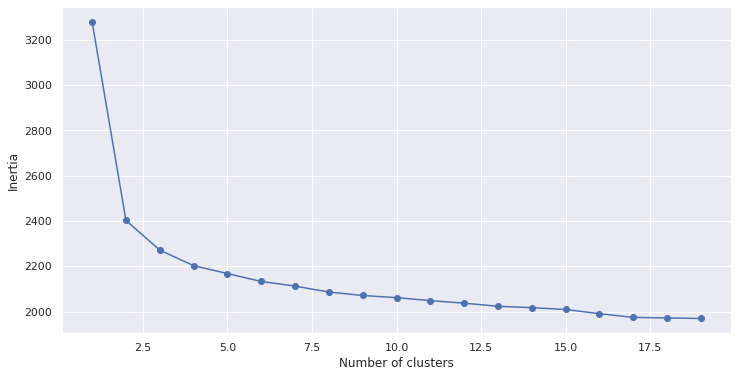

In [ ]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_normalized.iloc[:,1:])
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_normalized.iloc[:,1:])
pred = pd.Series(kmeans.predict(data_normalized.iloc[:,1:]))

In [ ]:
pca = PCA(n_components=2)
pca_data=pca.fit_transform(X=data_normalized.iloc[:,1:].values)

In [ ]:
data_pred = pd.DataFrame(data = {"column1":pca_data[:,0],"column2":pca_data[:,1],"cluster":pred})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


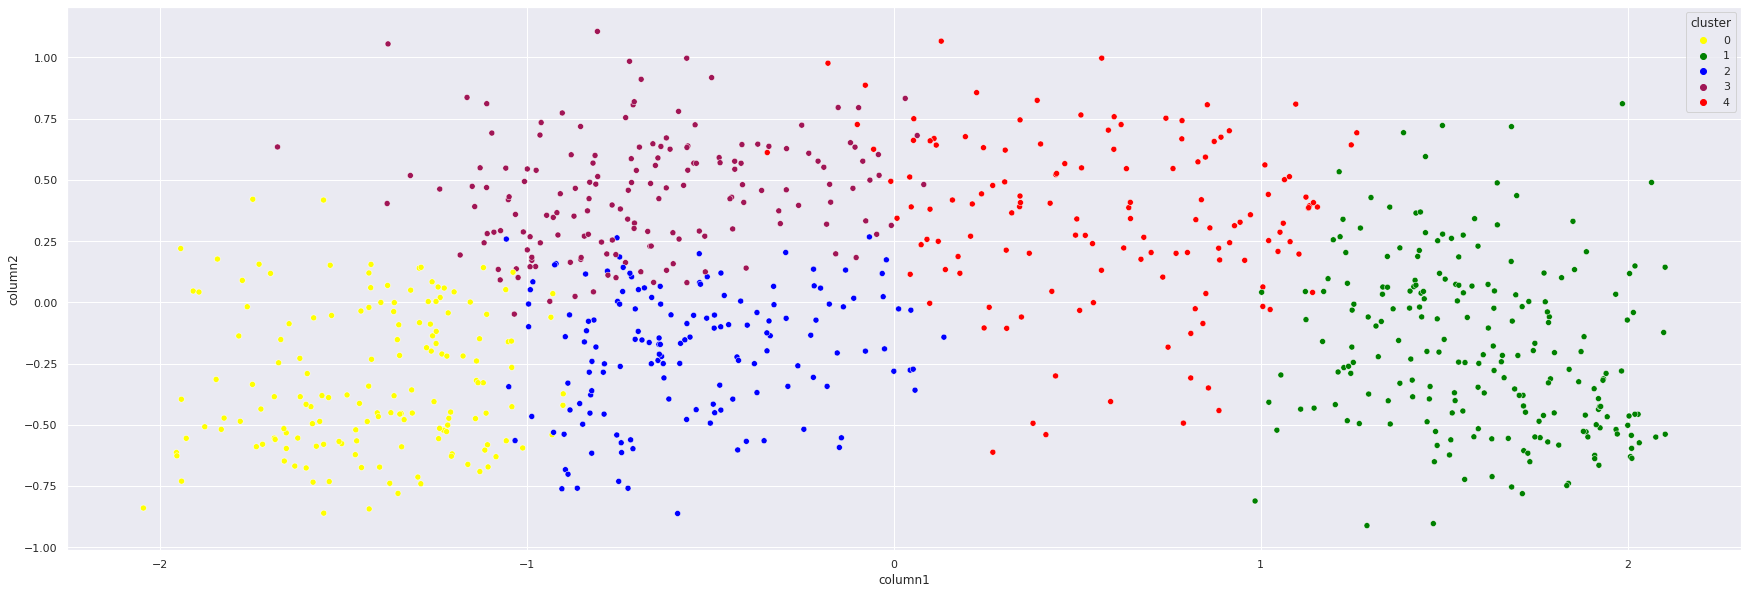

In [ ]:
# sb.set(rc={'figure.figsize':(15,10)})
sb.scatterplot("column1","column2",data=data_pred,hue="cluster",palette =["yellow","green","blue","#a01656","red"])
